### What is Pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

https://pandas.pydata.org/about/index.html

### Pandas Series

A Pandas Series is like a column in a table. It is a 1-D array holding data of any type.

### Importing Pandas

In [94]:
import numpy as np
import pandas as pd

### Series from lists

In [95]:
!ls /content/

bollywood.csv  kohli_ipl.csv  subs.csv


In [96]:
# string
country = ['India','Pakistan','USA','Nepal','Srilanka']

pd.Series(country)

,0
0,India
1,Pakistan
2,USA
3,Nepal
4,Srilanka


In [97]:
# integers
runs = [13,24,56,78,100]

runs_ser = pd.Series(runs)

In [98]:
# custom index
marks = [67,57,89,100]
subjects = ['maths','english','science','hindi']

pd.Series(marks,index=subjects)

,0
maths,67
english,57
science,89
hindi,100


In [99]:
# setting a name
marks = pd.Series(marks,index=subjects,name='Nitish ke marks')
marks

,Nitish ke marks
maths,67
english,57
science,89
hindi,100


### Series from dict

In [100]:
marks = {
    'maths':67,
    'english':67,
    'science':89,
    'hindi':100
}

marks_series = pd.Series(marks,name='nitish ke marks')
marks_series

,nitish ke marks
maths,67
english,67
science,89
hindi,100


### Series Attributes

In [101]:
# size
marks_series.size

4

In [102]:
# dtype
marks_series.dtype

dtype('int64')

In [103]:
# name
marks_series.name

'nitish ke marks'

In [104]:
# is_unique
marks_series.is_unique



False

In [105]:
# index
marks_series.index

Index(['maths', 'english', 'science', 'hindi'], dtype='object')

In [106]:
runs_ser.index

RangeIndex(start=0, stop=5, step=1)

In [107]:
# values
marks_series.values

array([ 67,  67,  89, 100])

In [108]:
!ls 

bollywood.csv  kohli_ipl.csv  subs.csv


### Series using read_csv

In [109]:
# with one col
subs = pd.read_csv('/content/subs.csv').squeeze()
type(subs)

pandas.core.series.Series

In [110]:
# with 2 cols
vk = pd.read_csv('/content/kohli_ipl.csv', index_col='match_no').squeeze()
vk

,runs
match_no,
1,1
2,23
3,13
4,12
5,1
...,...
211,0
212,20
213,73


In [111]:
movies = pd.read_csv('/content/bollywood.csv',index_col='movie').squeeze()
movies

,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
Battalion 609,Vicky Ahuja
The Accidental Prime Minister (film),Anupam Kher
Why Cheat India,Emraan Hashmi
Evening Shadows,Mona Ambegaonkar
...,...
Hum Tumhare Hain Sanam,Shah Rukh Khan
Aankhen (2002 film),Amitabh Bachchan
Saathiya (film),Vivek Oberoi


### Series methods

In [112]:
# head and tail
subs.head()

,Subscribers gained
0,48
1,57
2,40
3,43
4,44


In [113]:
vk.head(3)

,runs
match_no,
1,1
2,23
3,13


In [114]:
vk.tail(10)

,runs
match_no,
206,0
207,0
208,9
209,58
210,30
211,0
212,20
213,73
214,25


In [115]:
# sample
movies.sample(5)

,lead
movie,
Ek Ajnabee,Amitabh Bachchan
Yakeen (2005 film),Arjun Rampal
Nil Battey Sannata,Swara Bhaskar
Life Express (2010 film),Rituparna Sengupta
Pyaar Ka Punchnama 2,Kartik Aaryan


In [116]:
# value_counts -> movies
movies.value_counts()

,count
lead,
Akshay Kumar,48
Amitabh Bachchan,45
Ajay Devgn,38
Salman Khan,31
Sanjay Dutt,26
...,...
Seema Azmi,1
Akanksha Puri,1
Charanpreet Insan,1


In [117]:
# sort_values -> inplace
vk.sort_values(ascending=False)

,runs
match_no,
128,113
126,109
123,108
120,100
164,100
...,...
93,0
130,0
206,0


In [118]:
vk.sort_values(ascending=False).values[0]

np.int64(113)

In [119]:
# sort_index -> inplace -> movies (inplace - for permanent changes in dataset) 
movies.sort_index(ascending=False,inplace=True)

In [120]:
movies

,lead
movie,
Zor Lagaa Ke...Haiya!,Meghan Jadhav
Zokkomon,Darsheel Safary
Zindagi Tere Naam,Mithun Chakraborty
Zindagi Na Milegi Dobara,Hrithik Roshan
Zindagi 50-50,Veena Malik
...,...
2 States (2014 film),Arjun Kapoor
1971 (2007 film),Manoj Bajpayee
1920: The Evil Returns,Vicky Ahuja


In [121]:
vk.sort_values(ascending=False, inplace=True)

ValueError: This Series is a view of some other array, to sort in-place you must create a copy

In [ ]:
a = vk.copy()
a.sort_values(ascending=False, inplace=True)
a

,runs
match_no,
128,113
126,109
123,108
120,100
164,100
...,...
93,0
130,0
206,0


### Series Maths Methods

In [ ]:
# count
vk.count()

np.int64(215)

In [ ]:
# sum -> product
subs.sum()

,0
Subscribers gained,49510


In [ ]:
# mean -> median -> mode -> std -> var
subs.mean()
print(vk.median())
print(movies.mode())
print(subs.std())
print(vk.var())

24.0
           lead
0  Akshay Kumar
Subscribers gained    62.675023
dtype: float64
688.0024777222344


In [ ]:
# min/max
subs.max()

,0
Subscribers gained,396


In [ ]:
# describe
subs.describe()     

,Subscribers gained
count,365.000000
mean,135.643836
std,62.675023
min,33.000000
25%,88.000000
50%,123.000000
75%,177.000000
max,396.000000


### Series Indexing

In [ ]:
# integer indexing
x = pd.Series([12,13,14,35,46,57,58,79,9])
x

,0
0,12
1,13
2,14
3,35
4,46
5,57
6,58
7,79
8,9


In [124]:
# negative indexing  
# x[-1] #will give error bcoz pandas will start searching row with index -1 and which doesn't exist
x.iloc[-1] # use integer location bcoz it's independent of the index positions 

np.int64(9)

In [ ]:
movies

,lead
movie,
Zor Lagaa Ke...Haiya!,Meghan Jadhav
Zokkomon,Darsheel Safary
Zindagi Tere Naam,Mithun Chakraborty
Zindagi Na Milegi Dobara,Hrithik Roshan
Zindagi 50-50,Veena Malik
...,...
2 States (2014 film),Arjun Kapoor
1971 (2007 film),Manoj Bajpayee
1920: The Evil Returns,Vicky Ahuja


In [ ]:
marks_series

,nitish ke marks
maths,67
english,100
science,89
hindi,100
evs,10


In [ ]:
marks_series[-1] # idhr isliye kaam kra kyuki index numerical nahi th...in future ye bnd ho jyega (shyd jb aap is file ko dkh rhe ho ye nipat chuka ho)

/tmp/ipython-input-2890218235.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  marks_series[-1] # idhr isliye kaam kra kyuki index numerical nahi th...in future ye bnd ho jyega (shyd jb aap is file ko dkh rhe ho ye nipat chuka ho)


np.int64(10)

In [ ]:
# slicing
vk[5:16]

,runs
match_no,
6,9
7,34
8,0
9,21
10,3
11,10
12,38
13,3
14,11


In [ ]:
# negative slicing
vk[-5:] # ye slicing h naaki indexing so idhr work krega hi yeh


,runs
match_no,
211,0
212,20
213,73
214,25
215,7


In [ ]:
movies[::2] # [kahan_se:kahan_tak:kitne_steps]

,lead
movie,
Zor Lagaa Ke...Haiya!,Meghan Jadhav
Zindagi Tere Naam,Mithun Chakraborty
Zindagi 50-50,Veena Malik
Zinda (film),Sanjay Dutt
Zid (2014 film),Mannara Chopra
...,...
3 Storeys,Aisha Ahmed
3 Deewarein,Naseeruddin Shah
22 Yards,Barun Sobti


In [ ]:
# fancy indexing
vk[[1,3,4,5]]

,runs
match_no,
1,1
3,13
4,12
5,1


In [125]:
# indexing with labels -> fancy indexing
movies['Zor Lagaa Ke...Haiya!']

'Meghan Jadhav'

### Editing Series

In [126]:
# using indexing
marks_series[1] = 100
marks_series

/tmp/ipython-input-3621369324.py:2: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  marks_series[1] = 100


,nitish ke marks
maths,67
english,100
science,89
hindi,100


In [127]:
# what if an index does not exist
marks_series.loc['evs'] = 10

In [128]:
marks_series

,nitish ke marks
maths,67
english,100
science,89
hindi,100
evs,10


In [129]:
# slicing
runs_ser[2:4] = [100,100]
runs_ser

,0
0,13
1,24
2,100
3,100
4,100


In [130]:
# fancy indexing
runs_ser[[0,3,4]] = [0,0,0]
runs_ser

,0
0,0
1,24
2,100
3,0
4,0


In [131]:
# using index label
movies['2 States (2014 film)'] = 'Alia Bhatt'
movies

,lead
movie,
Zor Lagaa Ke...Haiya!,Meghan Jadhav
Zokkomon,Darsheel Safary
Zindagi Tere Naam,Mithun Chakraborty
Zindagi Na Milegi Dobara,Hrithik Roshan
Zindagi 50-50,Veena Malik
...,...
2 States (2014 film),Alia Bhatt
1971 (2007 film),Manoj Bajpayee
1920: The Evil Returns,Vicky Ahuja


### Copy and Views

It's important to note that when working with pandas, it's generally recommended to use copies of data when you want to modify the data independently of the original. Views can be useful for slicing and exploring data, but it's important to be aware of the potential impact on the original data.

### Series with Python Functionalities

In [133]:
# len/type/dir/sorted/max/min  #works best with series
print(len(subs))
print(type(subs))
print(dir(subs))
print(sorted(subs))
print(min(subs))
print(max(subs))
type(subs)

365
<class 'pandas.core.series.Series'>
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__column_consortium_standard__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce

pandas.core.series.Series

In [135]:
# type conversion
list(marks_series)

[67, 100, 89, 100, 10]

In [136]:
dict(marks_series)

{'maths': np.int64(67),
 'english': np.int64(100),
 'science': np.int64(89),
 'hindi': np.int64(100),
 'evs': np.int64(10)}

In [138]:
# membership operator

'2 States (2014 film)' in movies

True

In [139]:
'Alia Bhatt' in movies.values

True

In [140]:
movies

,lead
movie,
Zor Lagaa Ke...Haiya!,Meghan Jadhav
Zokkomon,Darsheel Safary
Zindagi Tere Naam,Mithun Chakraborty
Zindagi Na Milegi Dobara,Hrithik Roshan
Zindagi 50-50,Veena Malik
...,...
2 States (2014 film),Alia Bhatt
1971 (2007 film),Manoj Bajpayee
1920: The Evil Returns,Vicky Ahuja


In [142]:
# looping
for i in movies.index:
  print(i)

Zor Lagaa Ke...Haiya!
Zokkomon
Zindagi Tere Naam
Zindagi Na Milegi Dobara
Zindagi 50-50
Zindaggi Rocks
Zinda (film)
Zila Ghaziabad
Zid (2014 film)
Zero (2018 film)
Zeher
Zed Plus
Zameer: The Fire Within
Zameen (2003 film)
Zamaanat
Yuvvraaj
Yuva
Yun Hota Toh Kya Hota
Youngistaan
Yeh Saali Aashiqui
Yeh Mera India
Yeh Lamhe Judaai Ke
Yeh Khula Aasmaan
Yeh Jawaani Hai Deewani
Yeh Hai India
Yeh Hai Bakrapur
Yeh Dooriyan
Yeh Dil
Yatra (2007 film)
Yamla Pagla Deewana: Phir Se
Yamla Pagla Deewana
Yakeen (2005 film)
Yadvi – The Dignified Princess
Yaaram (2019 film)
Ya Rab
Xcuse Me
Woodstock Villa
Woh Lamhe...
Why Cheat India
What's Your Raashee?
What the Fish
Well Done Abba
Welcome to Sajjanpur
Welcome Back (film)
Welcome 2 Karachi
Welcome (2007 film)
Wedding Pullav
Wedding Anniversary
Waris Shah: Ishq Daa Waaris
War Chhod Na Yaar
Waqt: The Race Against Time
Wanted (2009 film)
Wake Up Sid
Wake Up India
Wajah Tum Ho
Waiting (2015 film)
Waisa Bhi Hota Hai Part II
Wah Taj
Wafa: A Deadly Love Story

In [143]:
# Arithmetic Operators(Broadcasting)
100 + marks_series

,nitish ke marks
maths,167
english,200
science,189
hindi,200
evs,110


In [146]:
# Relational Operators
vk >= 50

,runs
match_no,
1,False
2,False
3,False
4,False
5,False
...,...
211,False
212,False
213,True


### Boolean Indexing on Series

In [147]:
# Find no of 50's and 100's scored by kohli
vk[vk >= 50].size

50

In [149]:
# find number of ducks
vk[vk == 0].size

9

In [150]:
# Count number of day when I had more than 200 subs a day
subs[subs > 200].size

59

In [151]:
# find actors who have done more than 20 movies
num_movies = movies.value_counts()
num_movies[num_movies > 20]

,count
lead,
Akshay Kumar,48
Amitabh Bachchan,45
Ajay Devgn,38
Salman Khan,31
Sanjay Dutt,26
Shah Rukh Khan,22
Emraan Hashmi,21


### Plotting Graphs on Series

<Axes: >

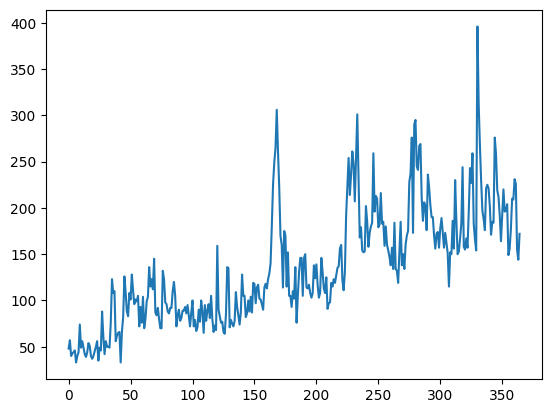

In [152]:
subs.plot()

<Axes: title={'center': 'Top 20 Movies'}, ylabel='count'>

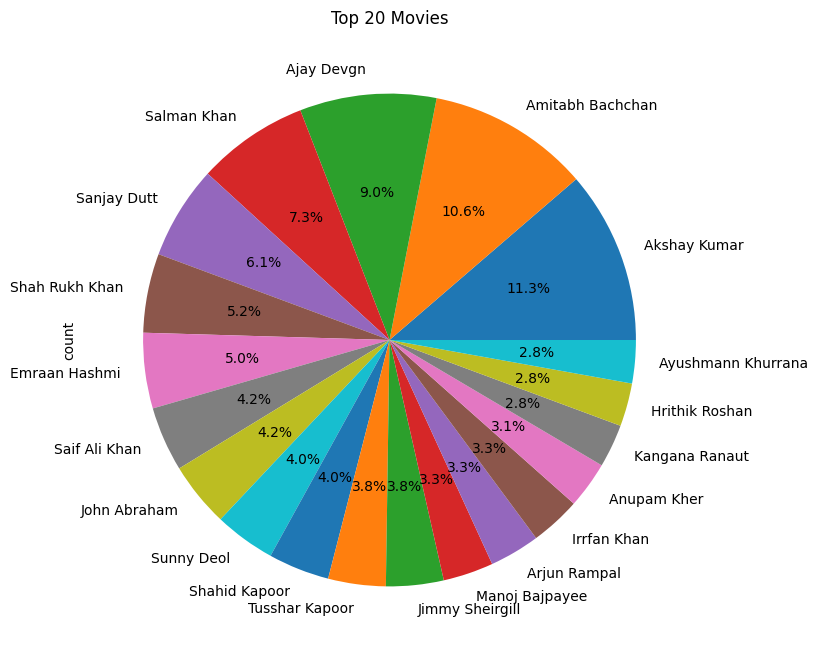

In [162]:
movies.value_counts().head(20).plot(kind='pie', title='Top 20 Movies', autopct='%1.1f%%', figsize=(10, 8))

### Some Important Series Methods

In [ ]:
# astype
# between
# clip
# drop_duplicates
# isnull
# dropna
# fillna
# isin
# apply
# copy

In [ ]:
import numpy as np
import pandas as pd

In [164]:
subs = pd.read_csv('/content/subs.csv').squeeze()
subs

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [167]:
vk = pd.read_csv('/content/kohli_ipl.csv',index_col='match_no').squeeze()
vk

,runs
match_no,
1,1
2,23
3,13
4,12
5,1
...,...
211,0
212,20
213,73


In [169]:
movies = pd.read_csv('/content/bollywood.csv',index_col='movie').squeeze()
movies

,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
Battalion 609,Vicky Ahuja
The Accidental Prime Minister (film),Anupam Kher
Why Cheat India,Emraan Hashmi
Evening Shadows,Mona Ambegaonkar
...,...
Hum Tumhare Hain Sanam,Shah Rukh Khan
Aankhen (2002 film),Amitabh Bachchan
Saathiya (film),Vivek Oberoi


In [172]:
# astype
import sys
sys.getsizeof(vk)

3472

In [175]:
sys.getsizeof(vk.astype('int16'))

2182

In [176]:
# between
vk[vk.between(51,99)].size

43

In [178]:
# clip
subs

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [181]:
subs.clip(100,200) # lower than 100 ko 100, higher than 200 ko 200 and between 100-200 ko same value

,Subscribers gained
0,100
1,100
2,100
3,100
4,100
...,...
360,200
361,200
362,155
363,144


In [184]:
# drop_duplicates
temp = pd.Series([1,1,2,2,3,3,4,4])
temp

,0
0,1
1,1
2,2
3,2
4,3
5,3
6,4
7,4


In [186]:
temp.drop_duplicates(keep='last') #last occurence rkha hai

,0
1,1
3,2
5,3
7,4


In [189]:
temp.duplicated().sum() #no. of duplicates bta rha h 

np.int64(4)

In [190]:
vk.duplicated().sum()

np.int64(137)

In [192]:
movies.drop_duplicates()

,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
Battalion 609,Vicky Ahuja
The Accidental Prime Minister (film),Anupam Kher
Why Cheat India,Emraan Hashmi
Evening Shadows,Mona Ambegaonkar
...,...
Sssshhh...,Tanishaa Mukerji
Rules: Pyaar Ka Superhit Formula,Tanuja
Right Here Right Now (film),Ankit


In [193]:
temp = pd.Series([1,2,3,np.nan,5,6,np.nan,8,np.nan,10])
temp

,0
0,1.0
1,2.0
2,3.0
3,NaN
4,5.0
5,6.0
6,NaN
7,8.0
8,NaN
9,10.0


In [195]:
temp.size

10

In [197]:
temp.count()

np.int64(7)

In [200]:
# isnull , number of missing values
temp.isnull().sum()

np.int64(3)

In [ ]:
# dropna
temp.dropna()

0     1.0
1     2.0
2     3.0
4     5.0
5     6.0
7     8.0
9    10.0
dtype: float64

In [ ]:
# fillna
temp.fillna(temp.mean())

0     1.0
1     2.0
2     3.0
3     5.0
4     5.0
5     6.0
6     5.0
7     8.0
8     5.0
9    10.0
dtype: float64

In [ ]:
# isin
vk[(vk == 49) | (vk == 99)]

match_no
82    99
86    49
Name: runs, dtype: int64

In [ ]:
vk[vk.isin([49,99])]

match_no
82    99
86    49
Name: runs, dtype: int64

In [ ]:
# apply
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [ ]:
movies.apply(lambda x:x.split()[0].upper())

movie
Uri: The Surgical Strike                  VICKY
Battalion 609                             VICKY
The Accidental Prime Minister (film)     ANUPAM
Why Cheat India                          EMRAAN
Evening Shadows                            MONA
                                         ...   
Hum Tumhare Hain Sanam                     SHAH
Aankhen (2002 film)                     AMITABH
Saathiya (film)                           VIVEK
Company (film)                             AJAY
Awara Paagal Deewana                     AKSHAY
Name: lead, Length: 1500, dtype: object

In [ ]:
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [ ]:
subs.apply(lambda x:'good day' if x > subs.mean() else 'bad day')

0       bad day
1       bad day
2       bad day
3       bad day
4       bad day
         ...   
360    good day
361    good day
362    good day
363    good day
364    good day
Name: Subscribers gained, Length: 365, dtype: object

In [ ]:
subs.mean()

135.64383561643837

In [ ]:
# copy

In [ ]:
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [ ]:
new = vk.head()

In [ ]:
new

match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int64

In [ ]:
new[1] = 1

In [ ]:
new = vk.head().copy()

In [ ]:
new[1] = 100

In [ ]:
new

match_no
1    100
2     23
3     13
4     12
5      1
Name: runs, dtype: int64

In [ ]:
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64